In [13]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

age | ❌ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad

species | ❌ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes

In [3]:
df=pd.read_csv('../EDA/datos/attack_limpio.csv', index_col=0)
df.sample(2)

,case_number,year,country,age,time,species_,mes,fatal_,sex2,cleaned_species
1313,2009.03.17,2009,usa,61,20h00,Thought to involve a cookie cutter shark,Mar,n,M,Undefined
2796,1990.05.13,1990,south africa,27,NAN,"6 m, 600-kg shark",May,n,NAN,Undefined


Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
- EJERCICIO 1: ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [5]:
df_num=df.select_dtypes(include=np.number)
df_num.sample(2)

,year,age
3696,1967,27
446,2016,48


- EJERCICIO 2: Identifica visualmente los outliers

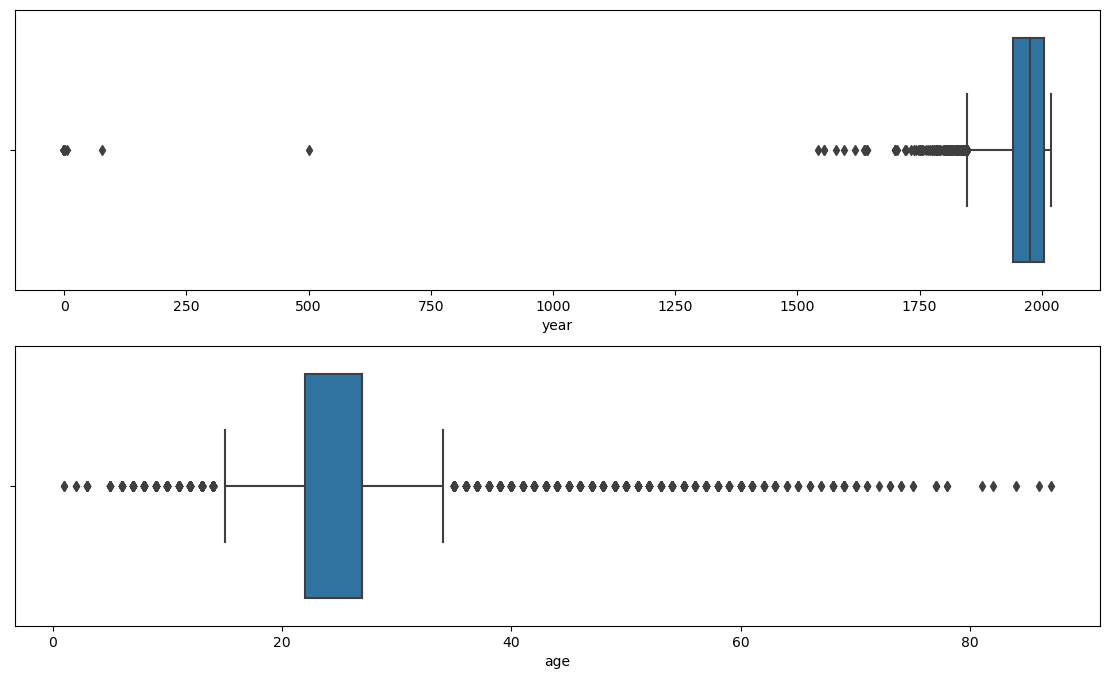

In [22]:
fig, ax = plt.subplots(2,1, figsize=(14,8))
for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

In [23]:
df_num.isnull().sum()

year    0
age     0
dtype: int64

- EJERCICIO 3: Identifica sobre el dataframe las filas que son outliers

In [52]:
q1_year=np.percentile(df["year"],25)
q3_year=np.percentile(df["year"],75)
iqr_year=q3_year-q1_year
outlier_step=1.5 * iqr_year
outliers_year=df[(df["year"]< q1_year - outlier_step) | (df["year"]> q3_year + outlier_step)]

In [53]:
outliers_year.sample(5)

,case_number,year,country,age,time,species_,mes,fatal_,sex2,cleaned_species
153,ND.0017,0,south africa,27,NAN,NAN,NAN,y,M,Undefined
35,1617.00.00.R,1617,india,27,NAN,NAN,NAN,NAN,NAN,Undefined
87,ND.0095,0,solomon islands,27,NAN,NAN,Feb,n,M,Undefined
59,ND-0136,0,usa,27,NAN,"Galapagos shark, 6'",NAN,n,M,Undefined
6194,1847.07.19,1847,greece,19,NAN,NAN,Jul,y,M,Undefined


In [49]:
q1_age=np.percentile(df["age"],25)
q3_age=np.percentile(df["age"],75)
iqr_age=q3_age-q1_age
outlier_age_step=1.5 * iqr_age
outliers_age=df[(df["age"]< q1_age - outlier_age_step) | (df["age"]> q3_age + outlier_age_step)]
outliers_age.sample(5)

,case_number,year,country,age,time,species_,mes,fatal_,sex2,cleaned_species
3843,1964.05.30,1964,panama,47,NAN,Lemon shark,May,n,M,Lemon
262,2017.09.03.a,2017,japan,42,10h00,NAN,Sep,n,M,Undefined
1726,2005.08.06,2005,usa,14,09h45,NAN,Aug,n,M,Undefined
1536,2007.06.17,2007,usa,9,16h30,Shark involvement not confirmed,Jun,NAN,F,Undefined
3388,1975.05.20,1975,usa,10,NAN,NAN,NAN,n,F,Undefined


- EJERCICIO 4: Reemplaza los outliers por el estadístico más correcto.

- EJERCICIO 5: Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.